<a href="https://colab.research.google.com/github/massilva/dominando-data-science/blob/main/aula07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning 101

## Aula 07

### Preparando os dados

In [3]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 6.5 MB/s 


In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
data = pd.read_csv(url)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [7]:
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'yes': 1, 'no': 0})
data['charges'] = data['charges'] / 1000
data['region'] = data['region'].map({region: i for i, region in enumerate(data['region'].unique())})
data.head()
# eda = sv.analyze(source=data, target_feat='sex')

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16.884924
1,18,1,33.770,1,0,1,1.725552
2,28,1,33.000,3,0,1,4.449462
3,33,1,22.705,0,0,2,21.984471
4,32,1,28.880,0,0,2,3.866855


### Algoritmos

#### Método dos Mínimos Quadrados (MMQ)

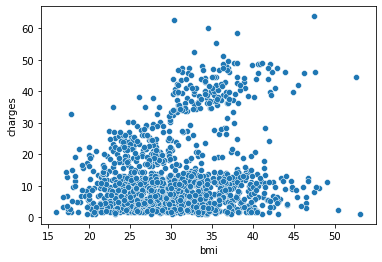

In [8]:
import seaborn as sb

sb.scatterplot(x = 'bmi', y='charges', data = data)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:

# padrão na matemática utilizar letra maiuscula para Matriz
X = data[['bmi']]
y = data['charges'] # variável resposta

new_bmi_data = [15, 22, 28, 33]
new_bmi_df = pd.DataFrame({'bmi': new_bmi_data})
model = LinearRegression()

model.fit(X, y)
print('b0', model.intercept_)
print('b1', model.coef_[0])
print()
print(':: MORE')
print('fi', model.fit_intercept)
print('co', model.coef_)
predict = model.predict(new_bmi_df)
print(predict)


b0 1.1929372089611512
b1 0.3938730307973951

:: MORE
fi True
co [0.39387303]
[ 7.10103267  9.85814389 12.22138207 14.19074723]


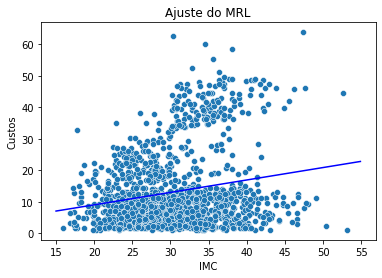

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot(model, data, x_label, y_label, colors, hue_label = None):
  b0 = model.intercept_
  b1,*bs = model.coef_

  sb.scatterplot(x = x_label, y = y_label, hue = hue_label, data = data)
  x_points = np.arange(15, 55, 0.1)
  base = b0 + b1 * x_points
  plt.plot(x_points, base, color = colors[0])

  for i, b in enumerate(bs, 1):
    y_points = base + b * i
    plt.plot(x_points, y_points, color = colors[i])
    base = y_points

  plt.title('Ajuste do MRL')
  plt.xlabel('IMC')
  plt.ylabel('Custos')
  plt.show()

plot(model, data, x_label='bmi', y_label='charges', colors=['blue', 'orange'])

In [12]:
# Add variável preditora

X = data[['bmi', 'smoker']]
y = data['charges']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

model.fit(Xtrain, ytrain)

predict = model.predict(Xtest)

eqm = mean_squared_error(ytest, predict)

eqm

50.10123647287512

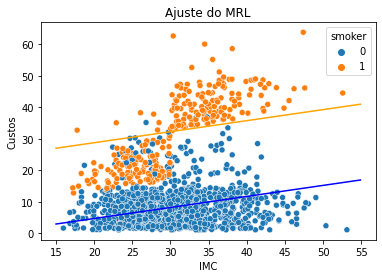

In [13]:
plot(model, data, x_label='bmi', y_label='charges', hue_label='smoker', colors=['blue', 'orange'])

In [14]:
def mean_error_n(model, n, mean_error_func=mean_squared_error, predict_variables=['bmi', 'smoker'], response_variable='charges', test_size=0.25):
  X = data[predict_variables]
  y = data[response_variable]
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=test_size)
  model.fit(Xtrain, ytrain)
  predict = model.predict(Xtest)
  return np.array([mean_error_func(ytest, predict) for _ in range(n)]).mean()

In [15]:
n = 10
print('EQM médio em #{} vezes: {}'.format(n, mean_error_n(model, n)))
print('MAE médio em #{} vezes: {}'.format(n, mean_error_n(model, n, mean_error_func=mean_absolute_error)))

EQM médio em #10 vezes: 50.89056028856517
MAE médio em #10 vezes: 5.386609598483297


### Ajuste do Modelo de Regressão Linear

Relacionando o imc (`bmi`) com as outras variáveis preditoras ('smoker', 'sex', 'children', 'region', 'age') para identificar a relação com os custos (`charges`).

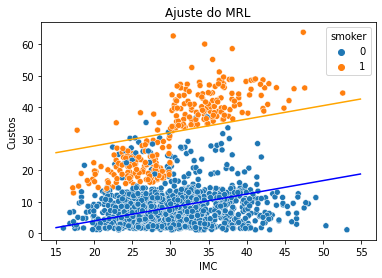

MSE: 54.263581898052074
MAE: 5.656436735669528



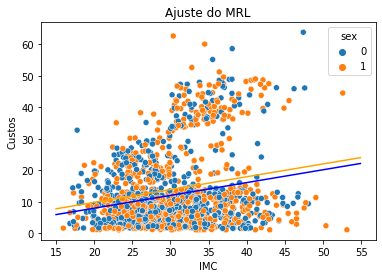

MSE: 159.85093180091513
MAE: 9.715108100614557



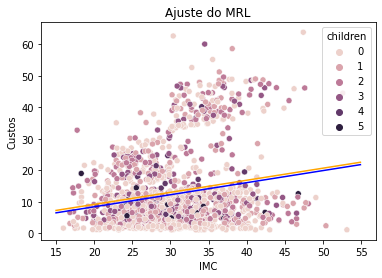

MSE: 135.8625242752135
MAE: 8.980773250228037



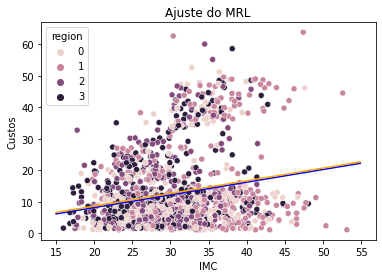

MSE: 152.3802627444882
MAE: 9.441113304263181



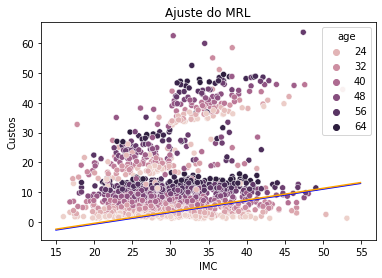

MSE: 128.1933014269916
MAE: 9.237709058168411



In [16]:
y = data['charges']
n = 10
predictions = ['smoker', 'sex', 'children', 'region', 'age']

for item in predictions:
  X = data[['bmi', item]]
  Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)
  model.fit(Xtrain, ytrain)
  predict = model.predict(Xtest)
  plot(model, data, x_label='bmi', y_label='charges', hue_label=item, colors=['blue', 'orange'])
  print('MSE: {}'.format(np.array([mean_squared_error(ytest, predict) for _ in range(n)]).mean()))
  print('MAE: {}'.format(np.array([mean_absolute_error(ytest, predict) for _ in range(n)]).mean()))
  print()


## Aula 08 - KNN